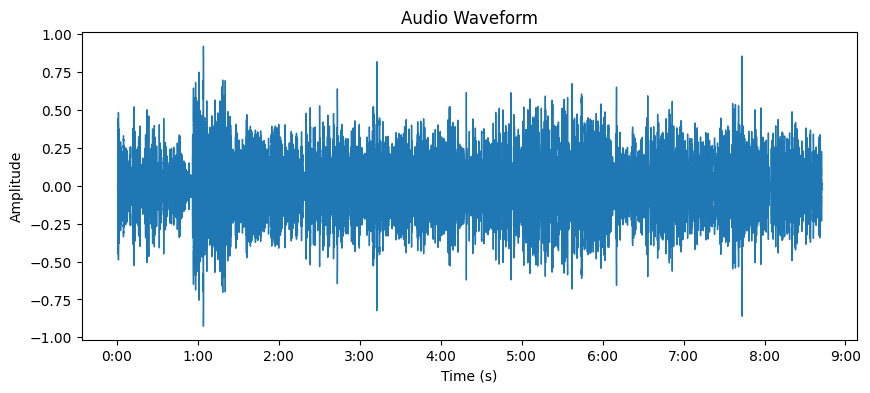

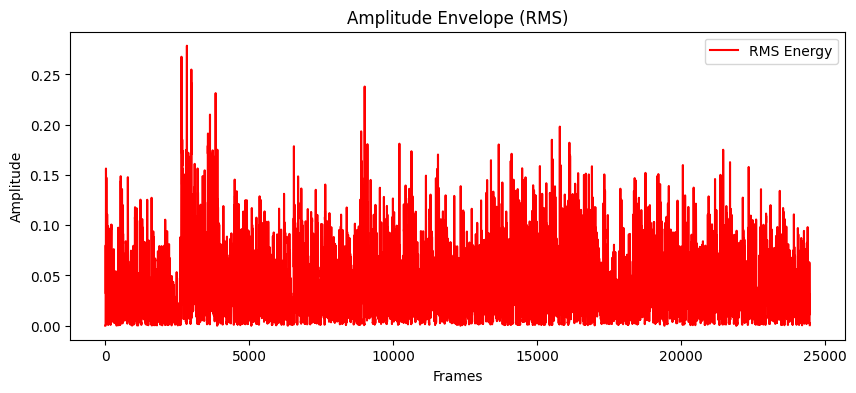

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


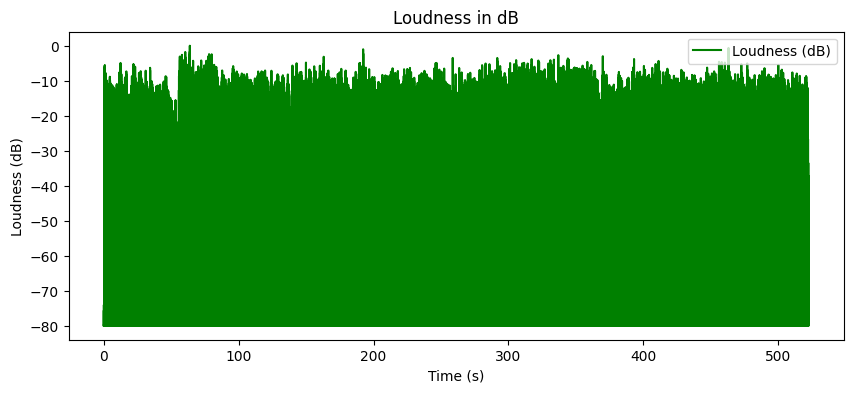

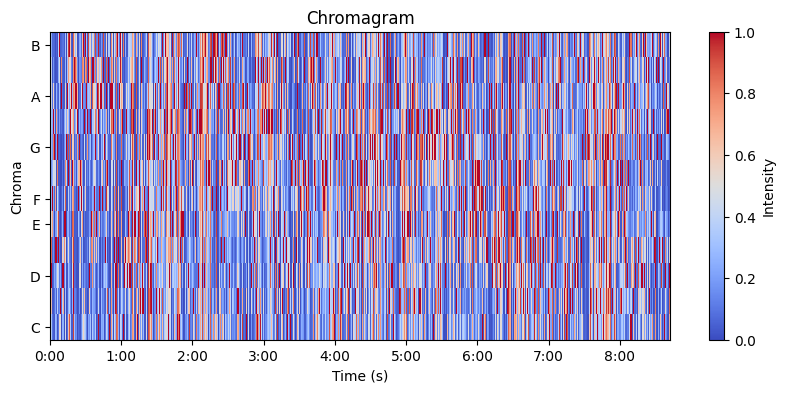

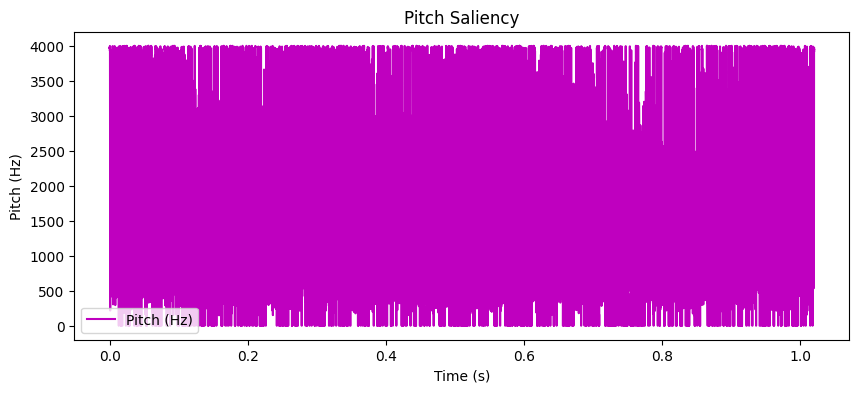

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

audio = '/content/datahygine.mp3'
audio_np_array, sample_rate = librosa.load(audio, sr=None)

# 1. Audio Waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio_np_array, sr=sample_rate)
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# 2. RMS Energy (Amplitude Envelope)
rms_energy = librosa.feature.rms(y=audio_np_array)
plt.figure(figsize=(10, 4))
plt.plot(rms_energy[0], label='RMS Energy', color='r')
plt.title('Amplitude Envelope (RMS)')
plt.xlabel('Frames')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# 3. Loudness (dB)
loudness_db = librosa.amplitude_to_db(np.abs(audio_np_array), ref=np.max)
time = np.linspace(0, len(loudness_db) / sample_rate, num=len(loudness_db))
plt.figure(figsize=(10, 4))
plt.plot(time, loudness_db, label='Loudness (dB)', color='g')
plt.title('Loudness in dB')
plt.xlabel('Time (s)')
plt.ylabel('Loudness (dB)')
plt.legend()
plt.show()

# 4. Chromagram
chroma = librosa.feature.chroma_stft(y=audio_np_array, sr=sample_rate)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', sr=sample_rate, cmap='coolwarm')
plt.colorbar(label='Intensity')
plt.title('Chromagram')
plt.xlabel('Time (s)')
plt.ylabel('Chroma')
plt.show()

# 5. Pitch Saliency
pitches, magnitudes = librosa.piptrack(y=audio_np_array, sr=sample_rate)
pitch_values = [np.max(pitches[:, t]) if np.sum(magnitudes[:, t]) > 0 else 0 for t in range(magnitudes.shape[1])]
time = np.linspace(0, len(pitch_values) / sample_rate, num=len(pitch_values))
plt.figure(figsize=(10, 4))
plt.plot(time, pitch_values, label='Pitch (Hz)', color='m')
plt.title('Pitch Saliency')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.legend()
plt.show()

# 6. Spectral Centroid with Mel Spectrogram
S = librosa.feature.melspectrogram(y=audio_np_array, sr=sample_rate)
spectral_centroid = librosa.feature.spectral_centroid(S=S, sr=sample_rate)
times = librosa.times_like(spectral_centroid, sr=sample_rate)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', sr=sample_rate, cmap='coolwarm')
plt.plot(times, spectral_centroid[0], label='Spectral Centroid', color='r')
plt.title('Mel Spectrogram with Spectral Centroid')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.show()

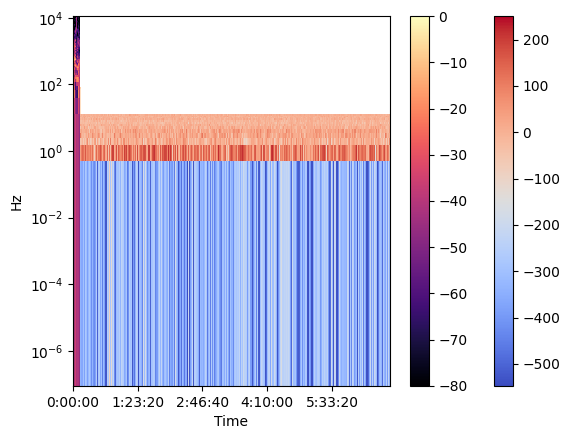

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

audio = '/content/datahygine.mp3'
audio_np_array, sample_rate = librosa.load(audio, sr=None)

amplitude_envelope = np.abs(librosa.effects.preemphasis(
    audio_np_array))  # preemphasis is a filter
librosa.display.waveshow(amplitude_envelope, sr=sample_rate)

loudness_db = librosa.amplitude_to_db(amplitude_envelope, ref=np.max)
librosa.display.waveshow(loudness_db, sr=sample_rate)

mfccs = librosa.feature.mfcc(y=audio_np_array, sr=sample_rate, n_mfcc=13)
librosa.display.specshow(mfccs, sr=sample_rate)
plt.colorbar()

S = librosa.feature.melspectrogram(y=audio_np_array, sr=sample_rate)
spectral_centroid = librosa.feature.spectral_centroid(S=S)
librosa.display.specshow(librosa.power_to_db(
    S, ref=np.max), x_axis='time', y_axis='mel')
plt.semilogy(spectral_centroid, label='Spectral Centroid', color='b')
plt.colorbar()